In [ ]:
!pip install rasterio

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import data, io, img_as_ubyte
from skimage.filters import threshold_multiotsu
import glob

In [ ]:
os.chdir("/content/drive/MyDrive/")

In [ ]:
ds=rasterio.open('ALL_ROI_SAT/ROI9.tif')
array =ds.read([1,2,3])

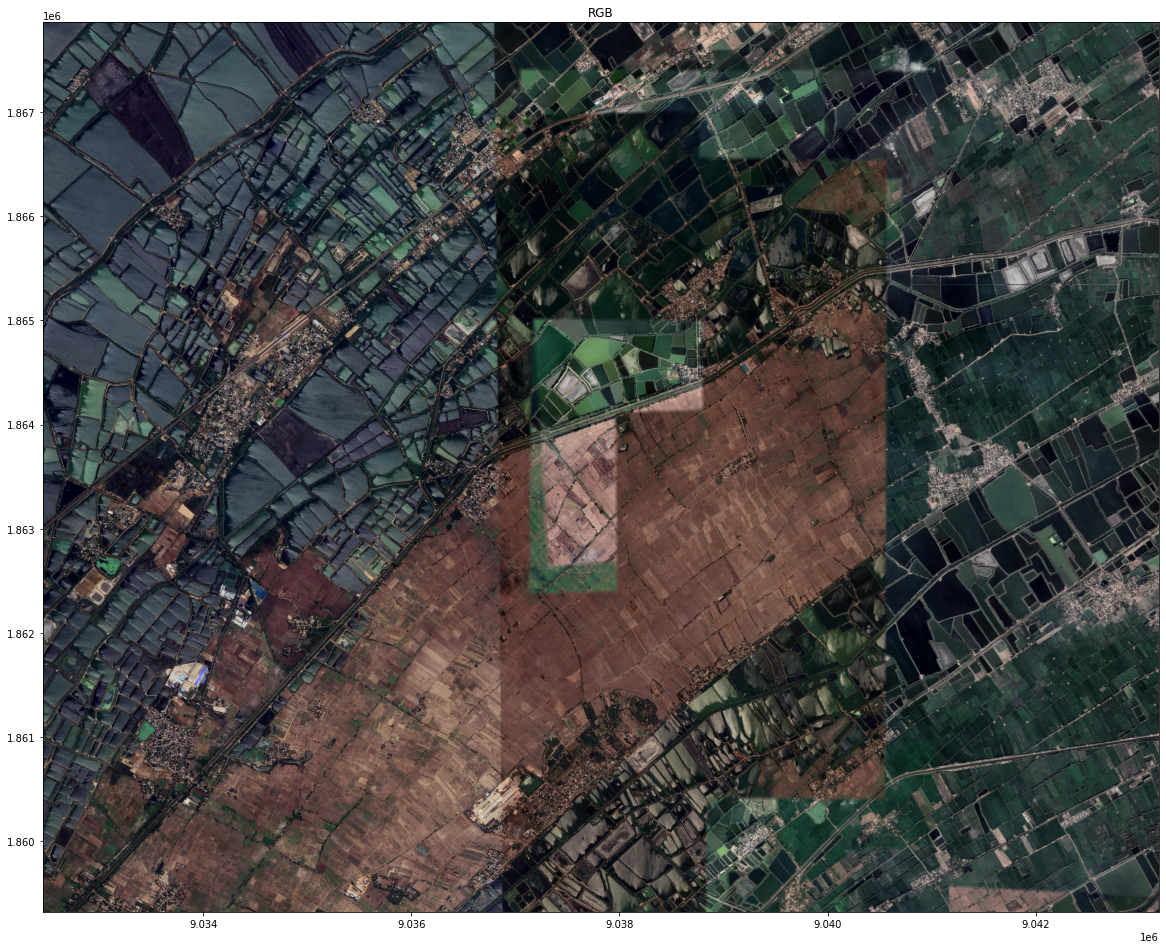

In [ ]:
plt.figure(figsize=(20, 20))
plt.title(label="RGB")
show(array,transform=ds.transform)

In [ ]:
i=0
for image in glob.glob("ALL_ROI_SAT/"+"*.tif"):
  # for i in range(len(glob.glob("ALL_ROI_SAT/"+"*.tif"))):
    ds=rasterio.open(image)
    arr=ds.read(2)
    thresholds = threshold_multiotsu(arr, classes=2)
    regions = np.digitize(arr, bins=thresholds)
    new_dataset = rasterio.open(
        'new_ROI'+str(i)+'.tif',
        'w',
        driver='GTiff',
        height=ds.shape[0],
        width=ds.shape[1],
        count=1,
        dtype='uint8',
        crs=ds.crs,
        nodata=1.0,
        transform=ds.transform )
    new_dataset.write(regions,1)
    new_dataset.close()
    i +=1
    if i > len(glob.glob("ALL_ROI_SAT/"+"*.tif")):
      break
    
  
    
